# Import & Explore

In [6]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
data = pd.read_excel('Training Dataset.xlsx')

# Category and Visualization

In [7]:
obj = []  # descrete data
con = []  # continuous data
for i in data.columns:
    if str(data[i].dtype)!= 'object':
        con.append(i)
    else:
        obj.append(i)
con = [e for e in con if e not in ('Id','Children','Year')]
obj.extend(['Children','Year'])
ob = obj.copy()
ob.remove('Employment Status')
ob.remove('Age Range')

In [8]:
co = con[3:17].copy()
df = pd.DataFrame()
for i in co:
    df[i] = data[i]/data['Total']
df = df.join(data.drop(co,axis = 1))
df.fillna(0,inplace = True)

# Clean data

In [4]:
df.columns

Index(['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep',
       'Caring for Children', 'Playing with Children', 'Job Searching',
       'Shopping', 'Eating and Drinking', 'Socializing & Relaxing',
       'Television', 'Golfing', 'Running', 'Volunteering', 'Id',
       'Education Level', 'Age', 'Age Range', 'Employment Status', 'Gender',
       'Children', 'Weekly Earnings', 'Year', 'Weekly Hours Worked', 'Total'],
      dtype='object')

### Questions:

#### 1. Summary of time spending pattern in 2012(like time spend per activity e.g. Socializing, eating,working, etc.)

In [5]:
data2012 = df[df['Year']==2012]

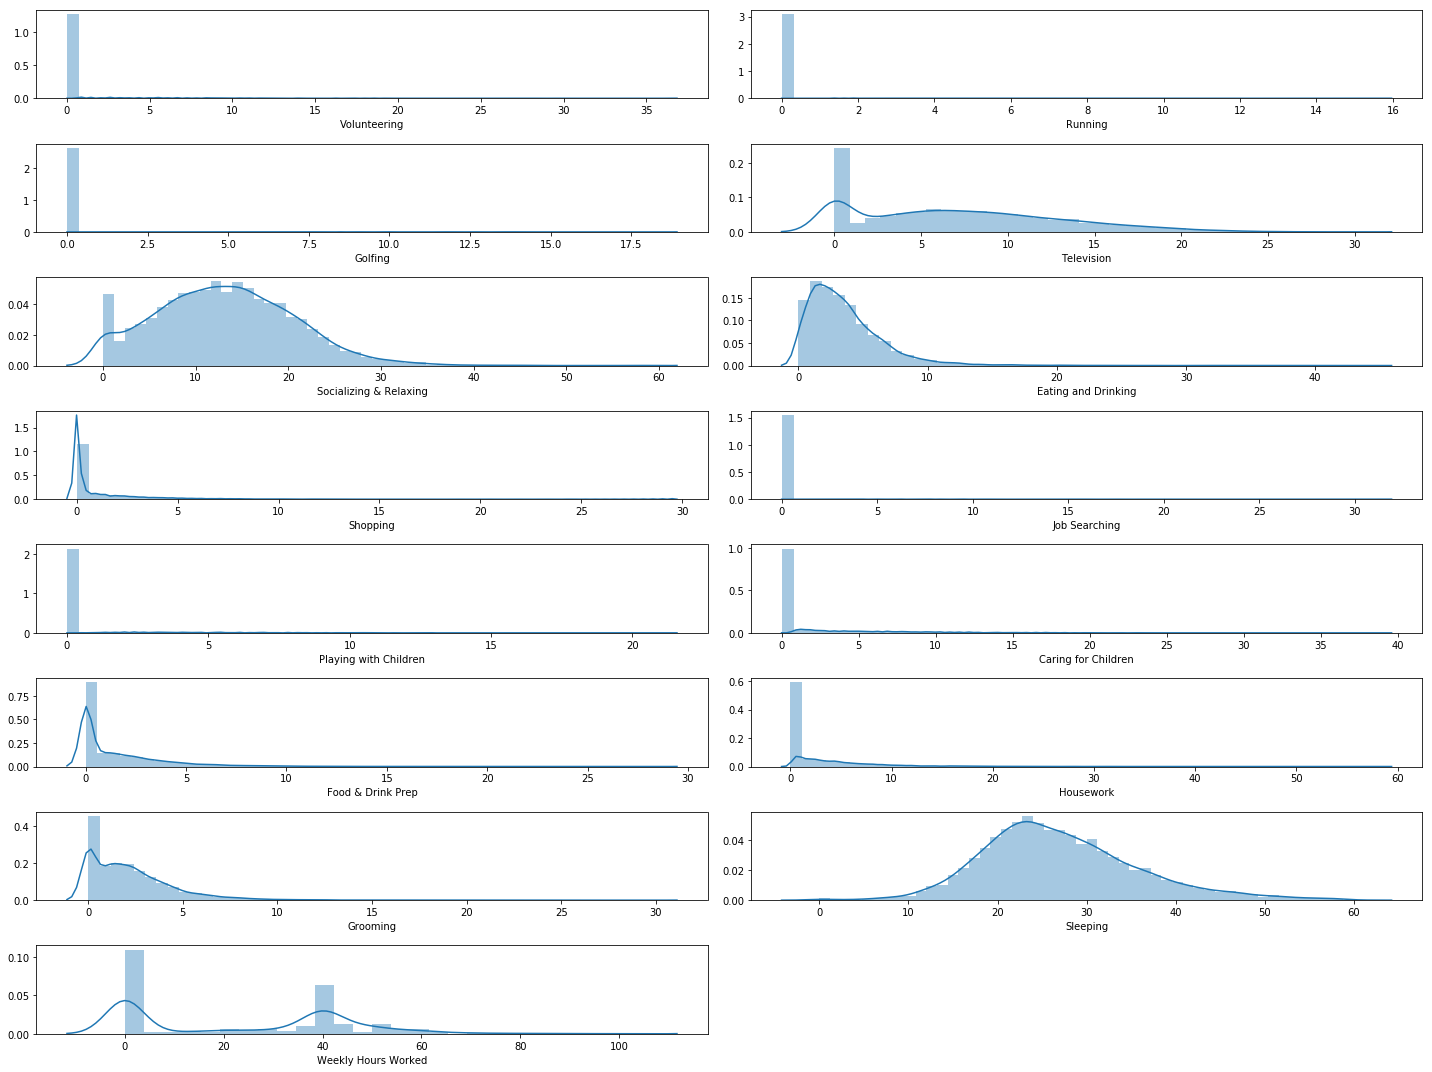

In [6]:
f = ['Weekly Hours Worked','Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep','Caring for Children', 'Playing with Children', 'Job Searching','Shopping', 'Eating and Drinking', 'Socializing & Relaxing','Television', 'Golfing', 'Running', 'Volunteering']
fig = plt.figure(figsize = (20,15))
for i in range(1,len(f)+1):
    ax = fig.add_subplot(8,2,i)
    sns.distplot(data2012[f.pop()])
plt.tight_layout()

In [7]:
data2012[['Weekly Hours Worked','Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep','Caring for Children', 'Playing with Children', 'Job Searching','Shopping', 'Eating and Drinking', 'Socializing & Relaxing','Television', 'Golfing', 'Running', 'Volunteering']].describe()

,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,23.250844,27.020830,2.224231,1.865984,1.571537,1.299944,0.370103,0.092836,1.094324,3.592624,13.154671,7.147983,0.064102,0.044209,0.456622
std,22.215753,8.741660,2.256632,3.785339,2.366044,3.236087,1.542621,1.072884,2.241137,2.989063,7.389925,5.789894,0.833714,0.457957,2.246516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.066320,0.408163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.522843,7.826087,2.092050,0.000000,0.000000,0.000000
50%,25.000000,25.913621,1.779661,0.000000,0.512528,0.000000,0.000000,0.000000,0.000000,2.975207,12.945508,6.605505,0.000000,0.000000,0.000000
75%,40.000000,31.941691,3.287671,2.222222,2.392027,0.000000,0.000000,0.000000,1.249133,4.875000,18.120805,11.047619,0.000000,0.000000,0.000000
max,100.000000,60.000000,30.000000,58.541667,28.521607,39.583333,21.575342,31.914894,29.259259,44.596273,58.064516,29.079755,18.918919,15.967742,36.857143


#### 2. How does the spending time in question 1 changes based on age, working status, education level etc.

In [8]:
# ratio total
data2 = pd.DataFrame()
data2['Working'] = data[data['Year']==2012]['Job Searching'] +data2012['Weekly Hours Worked']*60/7
data2['Family Time']= data2012[['Caring for Children', 'Playing with Children']].sum(axis = 1)
data2['Leisure']= data2012[['Grooming','Shopping','Socializing & Relaxing','Television', 'Golfing', 'Running','Volunteering']].sum(axis = 1)
data2['Necessary Activities'] = data2012[['Sleeping','Food & Drink Prep','Eating and Drinking','Housework']].sum(axis = 1)

In [9]:
# actually time
#data2 = pd.DataFrame()
#data2['Working'] = data[data['Year']==2012]['Job Searching'] +data2012['Weekly Hours Worked']*60/7
#data2['Family Time']= data[data['Year']==2012][['Caring for Children', 'Playing with Children']].sum(axis = 1)
#data2['Leisure']= data[data['Year']==2012][['Grooming','Shopping','Socializing & Relaxing','Television', 'Golfing', 'Running','Volunteering']].sum(axis = 1)
#data2['Necessary Activities'] = data[data['Year']==2012][['Sleeping','Food & Drink Prep','Eating and Drinking','Housework']].sum(axis = 1)

In [10]:
data2.describe()

,Working,Family Time,Leisure,Necessary Activities
count,8001.000000,8001.000000,8001.000000,8001.000000
mean,201.419680,1.670048,24.186141,34.050975
std,190.170658,4.398042,10.466928,9.851874
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.809339,27.272727
50%,231.428571,0.000000,24.511628,33.566434
75%,342.857143,0.000000,31.536145,40.384615
max,857.142857,43.150685,59.079755,60.000000


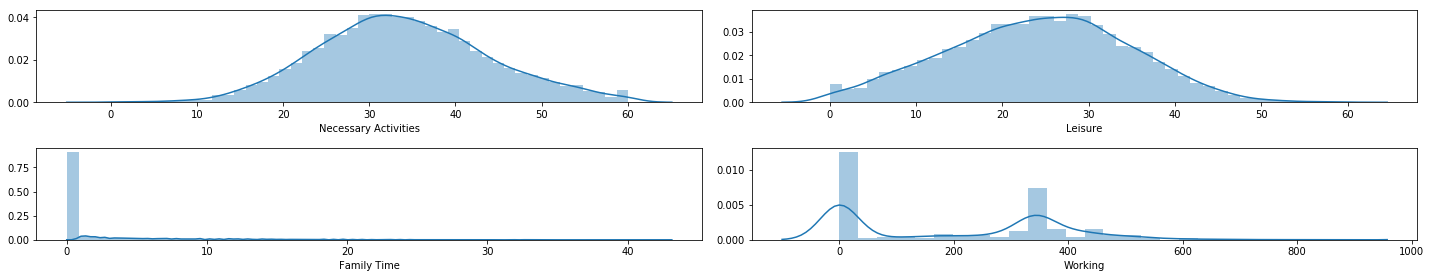

In [11]:
f = ['Working','Family Time','Leisure','Necessary Activities']
fig = plt.figure(figsize = (20,15))
for i in range(1,len(f)+1):
    ax = fig.add_subplot(8,2,i)
    sns.distplot(data2[f.pop()])
plt.tight_layout()

In [12]:
d = {'9th grade':'12th and below','10th grade':'12th and below','11th grade':'12th and below','12th grade':'12th and below',
'Associate Degree':'Bachelor & Associate','Bachelor':'Bachelor & Associate',
'High School':'High School & Some College','Some College':'High School & Some College',
'Master':'Master & Prof','Prof. Degree':'Master & Prof',
'Doctoral Degree':'Doctoral Degree'}
data2012['ELnew'] = data2012['Education Level'].map(d)

d = {0:0,1:1,2:2,3:3,4:4,5:4,6:4,7:4,8:4,9:4,10:4,11:4,12:4}
data2012['Cnew'] = data2012['Children'].map(d)
data2012.columns

d:\program files (x86)\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\program files (x86)\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Index(['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep',
       'Caring for Children', 'Playing with Children', 'Job Searching',
       'Shopping', 'Eating and Drinking', 'Socializing & Relaxing',
       'Television', 'Golfing', 'Running', 'Volunteering', 'Id',
       'Education Level', 'Age', 'Age Range', 'Employment Status', 'Gender',
       'Children', 'Weekly Earnings', 'Year', 'Weekly Hours Worked', 'Total',
       'ELnew', 'Cnew'],
      dtype='object')

In [13]:
f = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep','Caring for Children', 'Playing with Children', 'Job Searching','Shopping', 'Eating and Drinking', 'Socializing & Relaxing','Television', 'Golfing', 'Running', 'Volunteering']
data21 = pd.DataFrame()
data21 = pd.get_dummies(data2012.drop(f,axis = 1).drop(['Id','Age Range','Year','Weekly Hours Worked','Total','Education Level','Children'],axis = 1),columns = ['ELnew','Employment Status','Gender','Cnew'],drop_first = True)

data21.columns

Index(['Age', 'Weekly Earnings', 'ELnew_Bachelor & Associate',
       'ELnew_Doctoral Degree', 'ELnew_High School & Some College',
       'ELnew_Master & Prof', 'Employment Status_Not in labor force',
       'Employment Status_Unemployed', 'Gender_Male', 'Cnew_1', 'Cnew_2',
       'Cnew_3', 'Cnew_4'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

fom = lambda x: "%.2f" %x
for i in data2.columns:
    X_train,X_test, y_train, y_test = train_test_split(data21,data2[i])
    lr = LinearRegression().fit(X_train, y_train)
    s = list(zip(lr.coef_,data21.columns))
    s1 = str(lr.intercept_)+ ' + '
    for j in range(len(s)):
        if '0.00' in fom(s[j][0]):
            s1+=''
        else:
            s1+=str(fom(s[j][0])+s[j][1]+' + ')
    s1= s1[:len(s1)-3]
    print('For ',i,":")
    print(i,' = ',s1,'\n')
    
    #print(lr.score(X_train, y_train))
    #print(lr.score(X_test, y_test),)    

For  Working :
Working  =  256.51449458642315 + -0.44Age + 0.06Weekly Earnings + 26.03ELnew_Bachelor & Associate + 17.32ELnew_Doctoral Degree + 28.20ELnew_High School & Some College + 35.11ELnew_Master & Prof + -258.24Employment Status_Not in labor force + -244.17Employment Status_Unemployed + 21.89Gender_Male + -1.09Cnew_1 + -11.73Cnew_2 + -3.73Cnew_3 + -15.21Cnew_4 

For  Family Time :
Family Time  =  -0.9391367975700771 + -0.02Age + 2.17ELnew_Bachelor & Associate + 4.01ELnew_Doctoral Degree + 1.67ELnew_High School & Some College + 2.53ELnew_Master & Prof + 0.69Employment Status_Not in labor force + 0.12Employment Status_Unemployed + -0.31Gender_Male + 2.91Cnew_1 + 3.96Cnew_2 + 4.23Cnew_3 + 4.98Cnew_4 

For  Leisure :
Leisure  =  21.795686222896663 + 0.09Age + -3.00ELnew_Bachelor & Associate + -4.90ELnew_Doctoral Degree + -1.56ELnew_High School & Some College + -3.97ELnew_Master & Prof + 3.41Employment Status_Not in labor force + 2.76Employment Status_Unemployed + 2.09Gender_Male + -

#### 3. How time spend on baby care is changing based on education, working hours, income. (consider allyears). Other factors can also be considered

In [15]:
data3 = pd.DataFrame()
data3['Working'] = data['Job Searching'] +data['Weekly Hours Worked']*60/7
data3['Family Time']= df['Playing with Children']
data3['Leisure']= df[['Grooming','Shopping','Socializing & Relaxing','Volunteering','Television', 'Golfing', 'Running']].sum(axis = 1)
data3['Necessary Activities'] = df[['Housework','Food & Drink Prep', 'Sleeping','Eating and Drinking']].sum(axis = 1)

d = {'9th grade':'12th and below','10th grade':'12th and below','11th grade':'12th and below','12th grade':'12th and below',
'Associate Degree':'Bachelor & Associate','Bachelor':'Bachelor & Associate',
'High School':'High School & Some College','Some College':'High School & Some College',
'Master':'Master & Prof','Prof. Degree':'Master & Prof',
'Doctoral Degree':'Doctoral Degree'}
data3['ELnew'] = data['Education Level'].map(d)

d = {0:0,1:1,2:2,3:3,4:4,5:4,6:4,7:4,8:4,9:4,10:4,11:4,12:4}
data3['Cnew'] = data['Children'].map(d)

data3 = data3.join(data[['Age','Employment Status','Gender','Weekly Earnings', 'Year', 'Caring for Children']])
data31 = pd.get_dummies(data3,columns = ['ELnew','Cnew','Employment Status','Gender','Year'],drop_first = True)
data31.drop('Caring for Children',axis = 1).columns

Index(['Working', 'Family Time', 'Leisure', 'Necessary Activities', 'Age',
       'Weekly Earnings', 'ELnew_Bachelor & Associate',
       'ELnew_Doctoral Degree', 'ELnew_High School & Some College',
       'ELnew_Master & Prof', 'Cnew_1', 'Cnew_2', 'Cnew_3', 'Cnew_4',
       'Employment Status_Not in labor force', 'Employment Status_Unemployed',
       'Gender_Male', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012'],
      dtype='object')

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(data31.drop(['Caring for Children','Year_2006','Year_2007','Year_2009','Year_2010','Year_2008'],axis = 1))
est = sm.OLS(data31['Caring for Children'], X2)
est2 = est.fit()
q3 = pd.read_csv('Q3.csv')
print(est2.summary())

d:\program files (x86)\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                             OLS Regression Results                            
Dep. Variable:     Caring for Children   R-squared:                       0.894
Model:                             OLS   Adj. R-squared:                  0.893
Method:                  Least Squares   F-statistic:                 2.826e+04
Date:                 Tue, 20 Mar 2018   Prob (F-statistic):               0.00
Time:                         23:55:38   Log-Likelihood:            -2.9630e+05
No. Observations:                64006   AIC:                         5.926e+05
Df Residuals:                    63986   BIC:                         5.928e+05
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

[Text(0,0,'Working                               '),
 Text(0,0,'Family Time                           '),
 Text(0,0,'Leisure                               '),
 Text(0,0,'Necessary Activities                  '),
 Text(0,0,'Age                                   '),
 Text(0,0,'Weekly Earnings                       '),
 Text(0,0,'ELnew_Bachelor & Associate            '),
 Text(0,0,'ELnew_Doctoral Degree                 '),
 Text(0,0,'ELnew_High School & Some College      '),
 Text(0,0,'ELnew_Master & Prof                   '),
 Text(0,0,'Cnew_1                                '),
 Text(0,0,'Cnew_2                                '),
 Text(0,0,'Cnew_3                                '),
 Text(0,0,'Cnew_4                                '),
 Text(0,0,'Employment Status_Not in labor force  '),
 Text(0,0,'Employment Status_Unemployed          '),
 Text(0,0,'Gender_Male                           '),
 Text(0,0,'Year_2011                             '),
 Text(0,0,'Year_2012 ')]

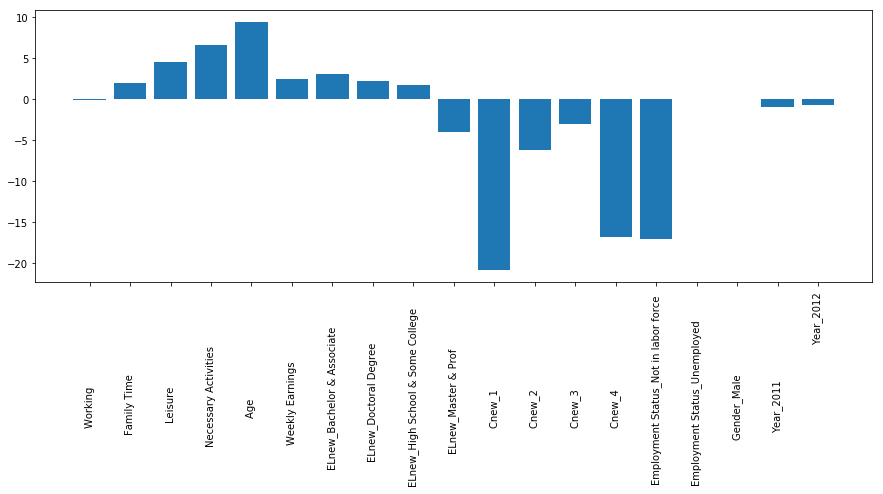

In [17]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
plt.bar(q3.Variables,q3.Coefficients)
ax.set_xticklabels(q3.Variables, rotation = 90)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data31.drop(['Caring for Children','Year_2006','Year_2007','Year_2009','Year_2010','Year_2008'],axis = 1), data31['Caring for Children'],random_state = 20)
lr.fit(X_train, y_train)
fom = lambda x: "%.2f" %x
s = list(zip(lr.coef_,data31.drop('Caring for Children',axis = 1).columns))
s1 = str(lr.intercept_)+ ' + '
for j in range(len(s)):
    if '0.00' in fom(s[j][0]):
        s1+=''
    else:
        s1+=str(fom(s[j][0])+s[j][1]+' + ')
s1= s1[:len(s1)-3]
print('y = ',s1,'\n')
#print(lr.score(X_train, y_train))
#lr.score(X_test, y_test)

y =  1023.1945308944341 + -0.03Working + -5.89Family Time + -16.75Leisure + -16.95Necessary Activities + -0.10Age + 2.46ELnew_Bachelor & Associate + 3.71ELnew_Doctoral Degree + 1.90ELnew_High School & Some College + 1.80ELnew_Master & Prof + 1.79Cnew_1 + 4.52Cnew_2 + 6.66Cnew_3 + 9.47Cnew_4 + -3.62Employment Status_Not in labor force + -20.74Employment Status_Unemployed + -3.03Gender_Male + -0.79Year_2006 + -0.77Year_2007 



#### 4. How is leisure time changing based on income and is there a difference between generations leisure spending time?

In [19]:
data4 = pd.DataFrame()
data4['Leisure']= df[['Grooming','Shopping','Socializing & Relaxing','Volunteering','Television', 'Golfing', 'Running']].sum(axis = 1)
data4 = data4.join(data[['Weekly Earnings', 'Age Range']])

data4.columns

Index(['Leisure', 'Weekly Earnings', 'Age Range'], dtype='object')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data4['Weekly Earnings'][:,np.newaxis], data4['Leisure'],random_state = 20)
lr.fit(X_train, y_train)
fom = lambda x: "%.2f" %x
s1 = str(lr.intercept_)+ ' + '+str(lr.coef_[0])+' * Weekly Earnings'
print('y = ',s1,'\n')

y =  25.20531052001991 + -0.0026603626903802975 * Weekly Earnings 



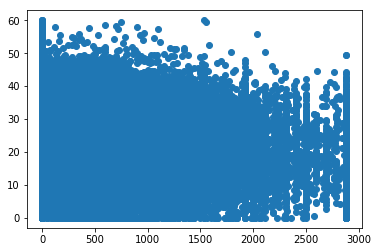

In [21]:
plt.scatter(data4['Weekly Earnings'],data4['Leisure'])

In [22]:
l = data4['Age Range'].unique().tolist()
l.sort()
for i in l:
    X_train, X_test, y_train, y_test = train_test_split(data4[data4['Age Range']==i]['Weekly Earnings'][:,np.newaxis], data4[data4['Age Range']==i]['Leisure'],random_state = 20)
    lr.fit(X_train, y_train)
    s1 = str(lr.intercept_)+ ' + '+str(lr.coef_[0])+' * Weekly Earnings'
    print(i,': y = ',s1,'\n')

0-19 : y =  24.62483219632357 + -0.002927648830985575 * Weekly Earnings 

20-29 : y =  22.469062919063013 + -0.0011635809311902605 * Weekly Earnings 

30-39 : y =  20.70332002763538 + -0.0005155362331436578 * Weekly Earnings 

40-49 : y =  23.0911061407063 + -0.0011537827509846962 * Weekly Earnings 

50-59 : y =  26.18772588777888 + -0.002060296791973809 * Weekly Earnings 

60-69 : y =  28.525352925061533 + -0.0033594877068236282 * Weekly Earnings 

70-79 : y =  29.712115267789493 + -0.004160184648123512 * Weekly Earnings 

80+ : y =  30.044490730424396 + -0.004554500812109694 * Weekly Earnings 



#### 5. Is there any change in the pattern when the great recession happened? If yes, then has the pattern continued after the recession? 

In [23]:
#data5 = data.groupby(by = 'Year').mean()
data5 = pd.DataFrame()
data5['Working'] = data['Job Searching'] +data['Weekly Hours Worked']*60/7
data5['Family Time']= df[['Playing with Children','Caring for Children']].sum(axis = 1)
data5['Leisure']= df[['Grooming','Shopping','Socializing & Relaxing','Volunteering','Television', 'Golfing', 'Running']].sum(axis = 1)
data5['Necessary Activities'] = df[['Housework','Food & Drink Prep', 'Sleeping','Eating and Drinking']].sum(axis = 1)
data51 = data5.join(data['Year']).groupby('Year')
data52 = data51.mean()
data51.describe()

Family Time                                                          \
           count      mean       std  min  25%  50%       75%        max   
Year                                                                       
2005      7999.0  1.861274  4.484454  0.0  0.0  0.0  0.897536  40.044944   
2006      8001.0  1.834610  4.523902  0.0  0.0  0.0  0.725076  41.670330   
2007      8001.0  1.862553  4.569319  0.0  0.0  0.0  0.779221  37.377049   
2008      8001.0  1.761703  4.370394  0.0  0.0  0.0  0.598007  51.168831   
2009      8001.0  1.796794  4.512708  0.0  0.0  0.0  0.311419  47.716186   
2010      8001.0  1.842574  4.621358  0.0  0.0  0.0  0.421546  42.272727   
2011      8001.0  1.676866  4.369924  0.0  0.0  0.0  0.081246  42.000000   
2012      8001.0  1.670048  4.398042  0.0  0.0  0.0  0.000000  43.150685   

     Leisure                ...      Necessary Activities       Working  \
       count       mean     ...                       75%   max   count   
Year                        ...                                           
2005  7999.0  23.620902     ...                 40.534421  60.0  7999.0   
2006  8001.0  23.755897     ...                 40.523560  60.0  8001.0   
2007  8001.0  23.684875     ...                 40.579710  60.0  8001.0   
2008  8001.0  24.074950     ...                 40.269710  60.0  8001.0   
2009  8001.0  24.114009     ...                 40.110497  60.0  8001.0   
2010  8001.0  23.876589     ...                 40.821566  60.0  8001.0   
2011  8001.0  24.093623     ...                 40.631579  60.0  8001.0   
2012  8001.0  24.186141     ...                 40.384615  60.0  8001.0   

                                                                             
            mean         std  min  25%         50%         75%          max  
Year                                                                         
2005  227.077706  189.516751  0.0  0.0  308.571429  342.857143  1371.428571  
2006  219.208170  192.621620  0.0  0.0  300.000000  342.857143  1371.428571  
2007  222.345100  191.266294  0.0  0.0  300.000000  342.857143  1020.000000  
2008  217.686146  189.880964  0.0  0.0  300.000000  342.857143  1037.142857  
2009  206.643527  189.253675  0.0  0.0  257.142857  342.857143   972.857143  
2010  201.551431  191.312230  0.0  0.0  222.857143  342.857143   985.714286  
2011  198.280072  188.907008  0.0  0.0  214.285714  342.857143  1020.000000  
2012  201.419680  190.170658  0.0  0.0  231.428571  342.857143   857.142857  

[8 rows x 32 columns]

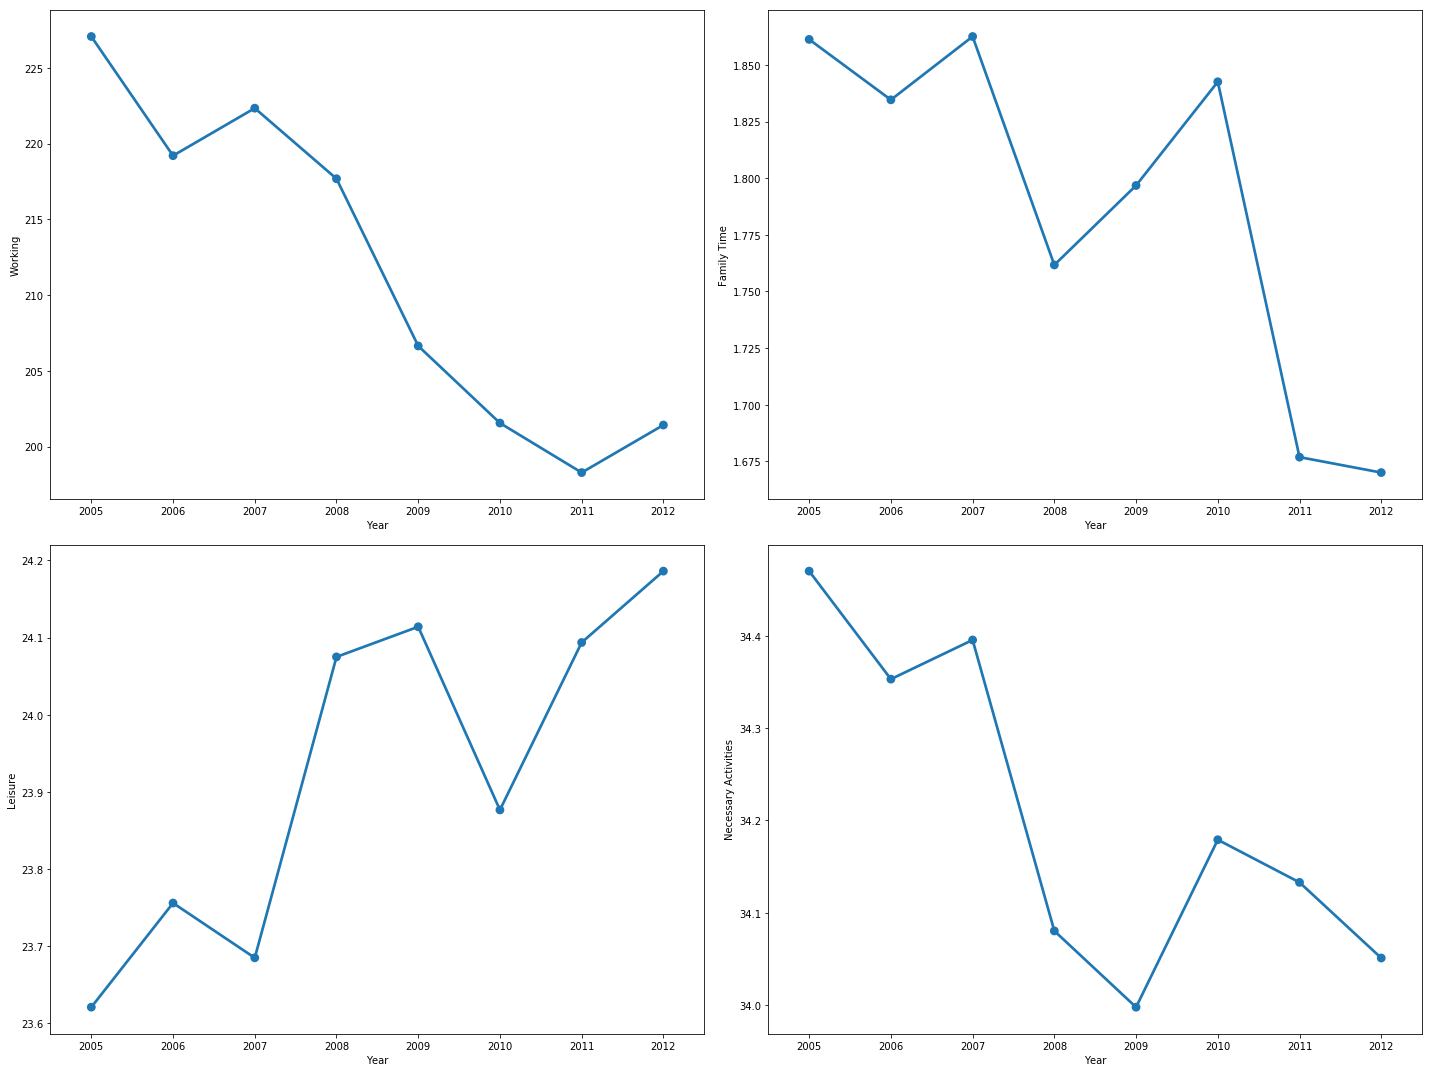

In [24]:
fig = plt.figure(figsize = (20,15))
for a,b in enumerate(data52.columns):
    ax = fig.add_subplot(2,2,a+1)
    sns.pointplot(x = data52.index,y = data52[b])
plt.tight_layout()

#### 6.Based on age what is an individual’s primary activity?

In [25]:
data6 = data5.join(data['Age Range'])
data61 = data6.groupby(by= 'Age Range').mean()
data61

,Working,Family Time,Leisure,Necessary Activities
Age Range,,,,
0-19,70.067204,0.406382,24.423337,35.129417
20-29,242.285084,2.962710,22.003362,34.932821
30-39,278.460907,4.255300,20.409004,35.235268
40-49,286.412346,2.121874,22.281094,35.502652
50-59,256.411354,0.469427,24.867725,34.551738
60-69,130.511421,0.157789,27.616438,32.189572
70-79,33.807253,0.061540,29.349107,30.586994
80+,10.176643,0.008449,29.780993,30.203590


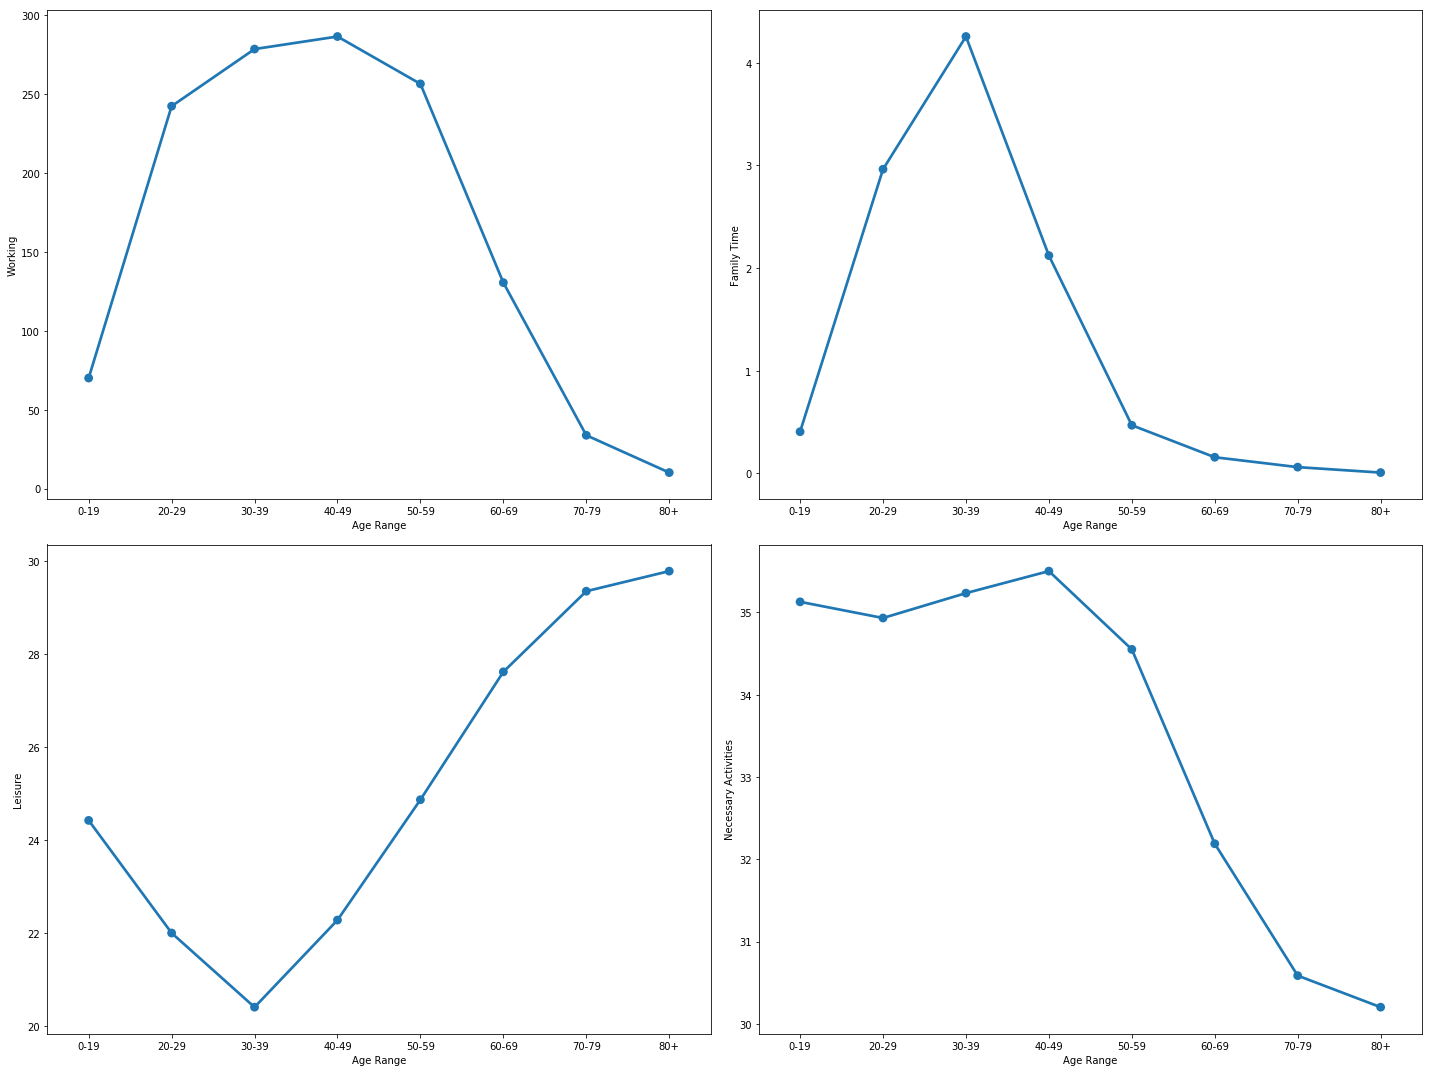

In [26]:
fig = plt.figure(figsize = (20,15))
for a,b in enumerate(data61.columns):
    ax = fig.add_subplot(2,2,a+1)
    sns.pointplot(x = data61.index,y = data61[b])
plt.tight_layout()

d:\program files (x86)\python36\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


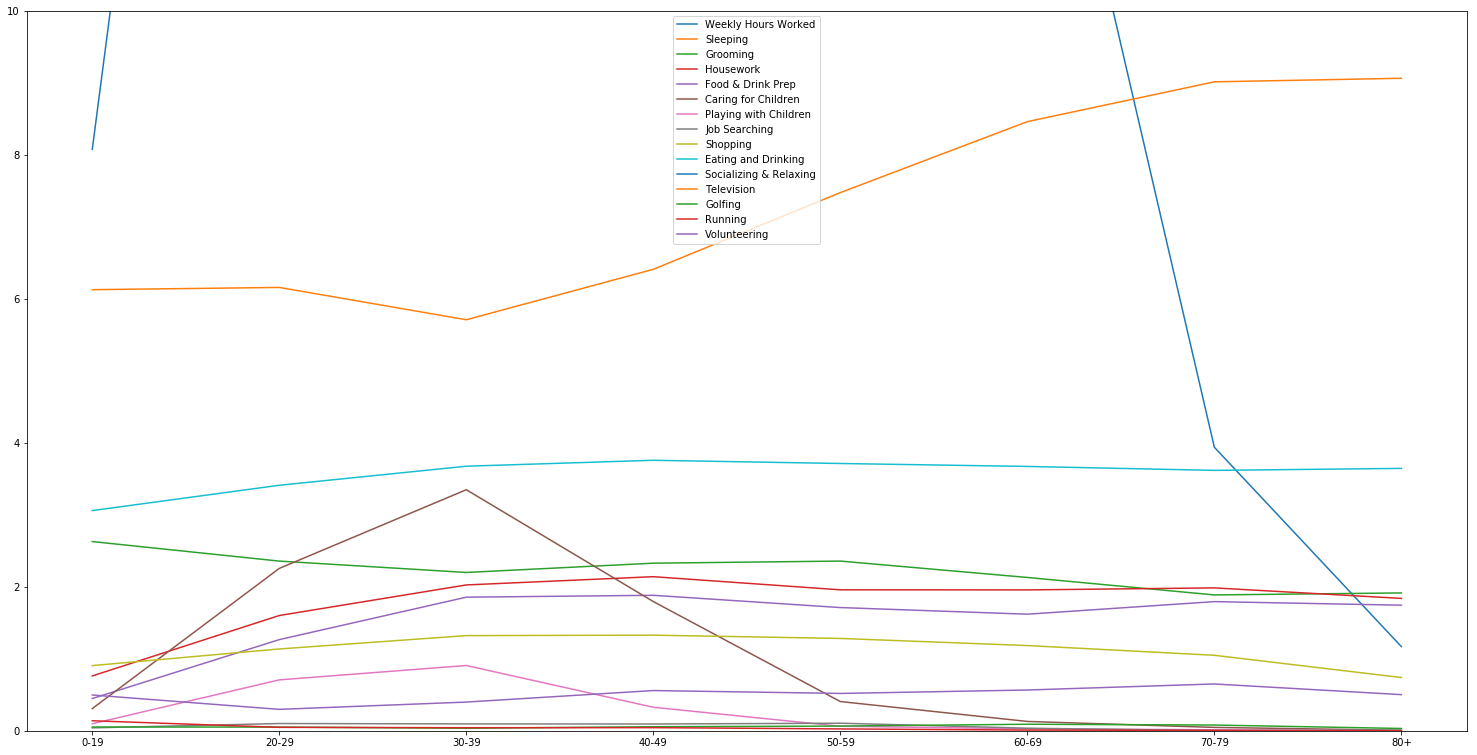

In [27]:
data62 = df.groupby('Age Range').mean()[con].drop(['Age','Weekly Earnings','Total',],axis = 1)

fig = plt.figure(figsize = (20,10))
ax = fig.add_axes([0,0,1,1])
for i in data62.columns:
    ax.plot(data62.index,data62[i])
ax.legend()
ax.set_ylim([0,10])
plt.tight_layout()

In [28]:
data63 = data62.drop(['Weekly Hours Worked','Sleeping'], axis = 1)
data63

,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering
Age Range,,,,,,,,,,,,,
0-19,2.628146,0.761993,0.448040,0.308658,0.097725,0.040864,0.905555,3.058514,14.073263,6.126758,0.052809,0.139500,0.497306
20-29,2.357007,1.601205,1.266381,2.255386,0.707324,0.101107,1.136823,3.410335,11.954352,6.157829,0.051524,0.048181,0.297646
30-39,2.199132,2.025849,1.855873,3.348300,0.907000,0.095791,1.322161,3.674745,10.701476,5.709123,0.035294,0.042832,0.398985
40-49,2.328028,2.140539,1.881911,1.794912,0.326963,0.094380,1.328444,3.757234,11.555817,6.409650,0.056376,0.043724,0.559055
50-59,2.357155,1.958013,1.711603,0.406265,0.063162,0.105573,1.282706,3.712595,13.142770,7.474700,0.065520,0.026010,0.518864
60-69,2.129658,1.956920,1.619566,0.130017,0.027772,0.036201,1.183933,3.671801,15.174370,8.460451,0.091263,0.010313,0.566450
70-79,1.887119,1.984838,1.794054,0.047057,0.014483,0.002360,1.048726,3.617002,16.663832,9.013501,0.079898,0.005508,0.650522
80+,1.914817,1.838955,1.744492,0.007862,0.000587,0.006967,0.739883,3.644640,17.528866,9.062935,0.032211,0.000000,0.502281


#### 7.Which is the most significant variable effecting the employment as well as unemployment?

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

data_np_con_s = scaler.fit_transform(data[con])
data_con_s = pd.DataFrame(data_np_con_s, columns = data[con].columns, index = data[con].index)

data_obj_s= pd.get_dummies(data[ob], columns = ob, drop_first = True)

data_s = pd.concat([data_con_s, data_obj_s], axis = 1)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_s,data['Employment Status'],stratify= data['Employment Status'], random_state = 20)


In [10]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C = 1)
linear_svm.fit(X_train, y_train)
print(linear_svm.score(X_train, y_train))
print(linear_svm.score(X_test, y_test))

0.9339638363469711
0.9314460692413449


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, linear_svm.predict(X_train))

array([[30306,   497,    20],
       [  436, 14121,   165],
       [   82,  1970,   407]], dtype=int64)

In [15]:
confusion_matrix(y_test, linear_svm.predict(X_test))

array([[10073,   196,     6],
       [  149,  4706,    53],
       [   22,   671,   126]], dtype=int64)

In [31]:
df_coef= pd.DataFrame(linear_svm.coef_,columns  = data_s.columns, index = data['Employment Status'].unique()).T
#for i in df_coef.columns:
#    df_coef = df_coef[abs(df_coef[i])>1]
df_coef

,Unemployed,Employed,Not in labor force
Age,-0.026352,0.344827,-0.346320
Weekly Earnings,11.514822,-9.393428,-3.335680
Weekly Hours Worked,11.645784,-9.804789,-2.973976
Sleeping,0.819061,-0.674011,-0.315332
Grooming,0.257960,-0.218798,-0.093545
Housework,0.293698,-0.247984,-0.101180
Food & Drink Prep,0.262734,-0.235148,-0.080541
Caring for Children,0.051943,-0.036507,-0.019825
Playing with Children,0.005590,-0.003008,-0.003736
Job Searching,0.003849,-0.038875,0.026931


In [32]:
data[['Weekly Earnings','Weekly Hours Worked']].corr()

,Weekly Earnings,Weekly Hours Worked
Weekly Earnings,1.000000,0.621763
Weekly Hours Worked,0.621763,1.000000


#### 8.Predict the values for employment variable in the test data set.

In [33]:
test = pd.read_excel('Test Dataset.xlsx')

In [34]:
test_np_con_s = scaler.transform(test[con])
test_con_s = pd.DataFrame(test_np_con_s, columns = test[con].columns, index = test[con].index)

test_obj_s= pd.get_dummies(test[ob], columns = ob, drop_first = True)
test_obj_s['Children_9']=0
test_obj_s['Children_11']=0
test_obj_s['Children_12']=0
test_s = pd.concat([test_con_s, test_obj_s], axis = 1)

In [35]:
test['Employment Status'] = linear_svm.predict(test_s)

In [36]:
test['Employment Status'].value_counts()

Employed              20656
Not in labor force    11763
Unemployed              851
Name: Employment Status, dtype: int64

# Models

In [ ]:
###################################################################
# SVC
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 1, gamma = 0.01)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_s,data['Employment Status'], random_state = 20)
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train)) # 0.9136113657195234
print(svm.score(X_test, y_test))   # 0.9015748031496063

In [ ]:
###################################################################
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train) # 0.8987167736021998
knn.score(X_test, y_test)   # 0.8185226846644169

In [ ]:
###################################################################
# Linear models for multiclass classification
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C = 1)
linear_svm.fit(X_train, y_train)
print(linear_svm.score(X_train, y_train))  # 0.9429005916173652 0.9308599283393051
print(linear_svm.score(X_test, y_test))    # 0.9447569053868267 0.9335083114610674

In [ ]:
###################################################################
# Random forests with out scale
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200, random_state = 3,n_jobs = -1)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train)) # 1
print(forest.score(X_test, y_test))   # 0.9467566554180727

In [ ]:
###############################################################
# Gradient Boosted Regression Tree
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train)) # 0.9460461628197651
print(gbrt.score(X_test, y_test))   # 0.9467566554180727

In [ ]:
###############################################################
# Neural Networks
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',random_state = 0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
print(mlp.score(X_train, y_train)) # 0.9460461628197651
print(mlp.score(X_test, y_test))   # 0.9467566554180727